<a href="https://colab.research.google.com/github/Mrcold2002/colab_code/blob/main/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%EF%BC%88Mxnet%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

本次线性回归采用Mxnet提供的Gluon接口，更方便实现线性回归训练

1 导入试验所需的包

In [55]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd,nd
import random

2 生成数据集合

In [56]:
num_inputs=2 #输入参数两个
num_examples=1000 # 共1000个数据
true_w=[2,-3.4]
true_b=4.2  # 真实参数
features=nd.random.normal(scale=1,shape=(num_examples,num_inputs)) # 正态分布的数据
labels=true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b # 真实标签
labels+=nd.random.normal(scale=0.01,shape=labels.shape) # 给正态分布的随机误差

In [42]:
features[0],labels[0]

(
 [-0.80323476  1.7926482 ]
 <NDArray 2 @cpu(0)>, 
 [-3.4993947]
 <NDArray 1 @cpu(0)>)

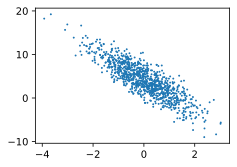

In [57]:
def use_svg_display():
  #用矢量图显示
  display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5,2.5)):
  use_svg_display()
  # 设置图的尺寸
  plt.rcParams['figure.figsize']=figsize
set_figsize()
plt.scatter(features[:,1].asnumpy(),labels.asnumpy(),1);#加分号只显示图


3 读取数据集

In [58]:
# Gluon提供了data包来读取数据
from mxnet.gluon import data as gdata 

batch_size=10
# 将训练集数据的特征合标签组合
dataset=gdata.ArrayDataset(features,labels)
# 随机读取小批量数据
data_iter=gdata.DataLoader(dataset,batch_size,shuffle=True)

In [45]:
for X,y in data_iter:
  print(X,y)
  break


[[-0.3822424  -0.9951224 ]
 [ 0.29301867  2.8776112 ]
 [-2.5062802   2.2287023 ]
 [ 2.467489    1.4334713 ]
 [ 0.4492575   0.63431567]
 [ 1.0200973  -0.16763406]
 [ 1.6536041  -1.3604288 ]
 [-0.2214991   0.57712275]
 [ 0.90625787  0.33079392]
 [-1.9288555  -0.595052  ]]
<NDArray 10x2 @cpu(0)> 
[ 6.825681  -4.9890866 -8.3937435  4.2609224  2.9497693  6.788214
 12.125396   1.792481   4.872568   2.3748379]
<NDArray 10 @cpu(0)>


4 定义模型

In [69]:
# 从gluon中导入神经网络模块 (neural network = nn)
from mxnet.gluon import nn
# Sequential可看作一个串联各层的容器，构造模型时，我们可以在该容器中一次添加层
net = nn.Sequential()
# 因线性回归只有一层，且为全连接层（是一个Dense实例），定义该层层数为1
net.add(nn.Dense(1))

5 初始化模型参数

In [72]:
from mxnet import init
# 指定权重参数为正态分布
net.initialize(init.Normal(sigma=0.01))

6 定义损失函数

In [70]:
from mxnet.gluon import loss as gloss
# 平方损失又称L2范数损失  
loss=gloss.L2Loss()

7 定义优化函数

In [74]:
from mxnet import gluon 
#导入Gluon后，创建一个Trainer实例，并指定学习率为0.03的小批量随机梯度下降(sgd)为优化算法。
#该优化算法将用来迭代net实例所有通过add函数嵌套的层所包含的全部参数，这些参数通过collect_params函数收集
trainer = gluon.Trainer(net.collect_params(),'sgd',{'learning_rate':0.03})

8 训练模型

In [75]:
num_epochs=10#迭代周期

for epoch in range(num_epochs):
  for X,y in data_iter:
    with autograd.record():
      l=loss(net(X),y)# l是有关小批量X合y的损失
    l.backward()#小批量的损失对模型参数求梯度
    trainer.step(batch_size)
  l=loss(net(features),labels)
  print('epoch %d,loss %f'%(epoch+1,l.mean().asnumpy()))

epoch 1,loss 0.041865
epoch 2,loss 0.000164
epoch 3,loss 0.000049
epoch 4,loss 0.000049
epoch 5,loss 0.000049
epoch 6,loss 0.000049
epoch 7,loss 0.000049
epoch 8,loss 0.000049
epoch 9,loss 0.000049
epoch 10,loss 0.000049


In [76]:
true_w,net[0].weight.data()

([2, -3.4], 
 [[ 2.0001853 -3.3995023]]
 <NDArray 1x2 @cpu(0)>)

In [77]:
true_b,net[0].bias.data()

(4.2, 
 [4.1999197]
 <NDArray 1 @cpu(0)>)